### ✍ В этом юните мы разберём последний интересующий нас метод кластеризации — **агломеративную иерархическую кластеризацию**. Она применяется, например, для анализа медицинских данных и решения банковских задач. После её изучения вы будете разбираться во всех основных алгоритмах кластеризации, а значит, сможете без проблем решать практические задачи.

Иерархическая кластеризация — очень популярный метод кластеризации в силу простоты реализации и интерпретации. По ходу её работы создаются кластеры, организованные в иерархическую структуру. Эту структуру можно визуализировать с помощью древовидной диаграммы, называемой дендрограммой.

Например, ниже вы можете видеть пример дендрограммы, иллюстрирующей «родословную» птиц.

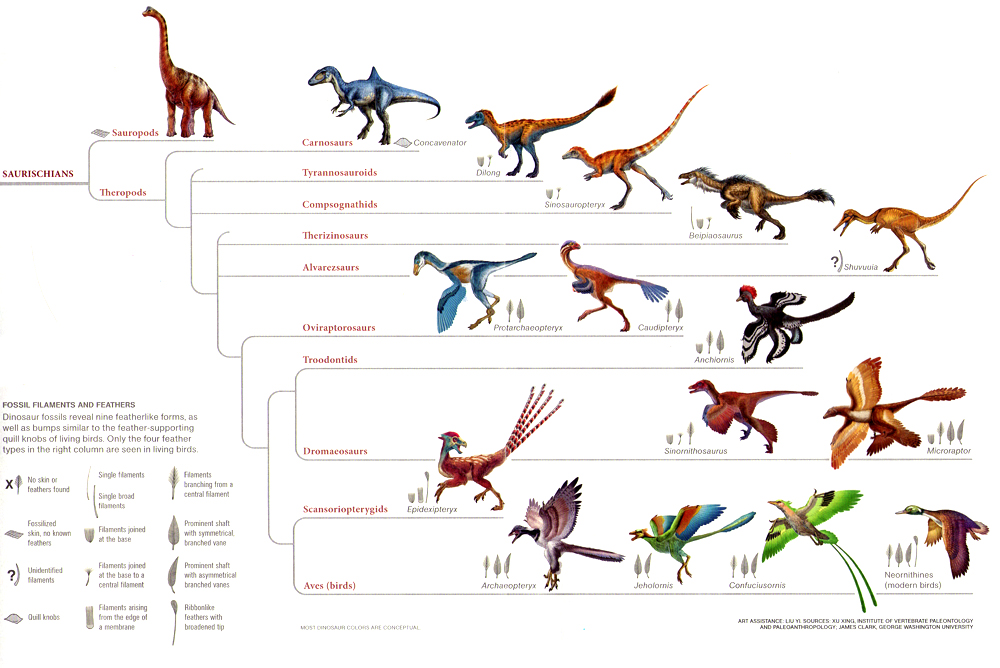

При **агломеративном** подходе кластеризации дендрограмма записывает последовательность слияний, при **дивизионном** — последовательность расщеплений.

## **АГЛОМЕРАТИВНЫЙ АЛГОРИТМ**

+ изначально каждый объект является отдельным кластером;
+ на каждом шаге соединяем два самых близких кластера;
+ останавливаемся, когда получаем требуемое количество кластеров или единственный кластер.

## **ДИВИЗИОННЫЙ (ДИВИЗИВНЫЙ) АЛГОРИТМ**

+ начинаем с ситуации, когда все объекты входят в один кластер;
+ на каждом шаге разделяем один из кластеров пополам;
+ останавливаемся, когда достигается необходимое количество кластеров или количество кластеров, равное числу объектов.

Ниже представлены схемы дендрограмм для агломеративной и дивизионной иерархической кластеризации:

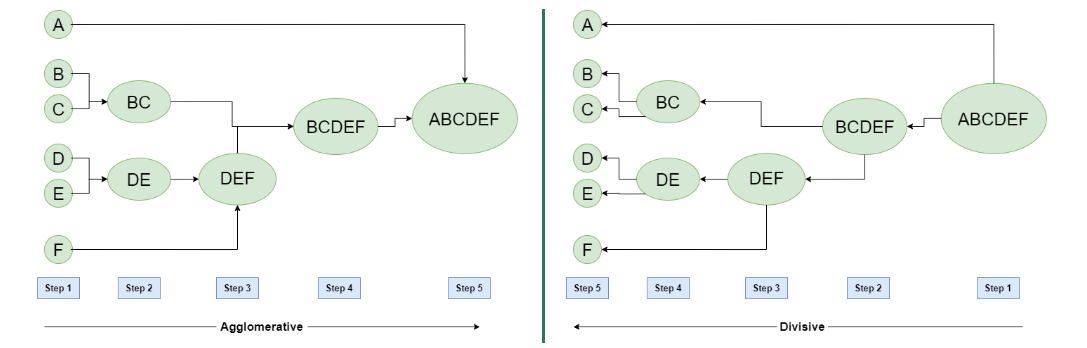

Чтобы лучше понять, что показывает дендрограмма, можно сравнить картинку с разделением на кластеры (слева), аналогичные которой мы уже рассматривали в предыдущих юнитах, и непосредственно дендрограмму (справа):

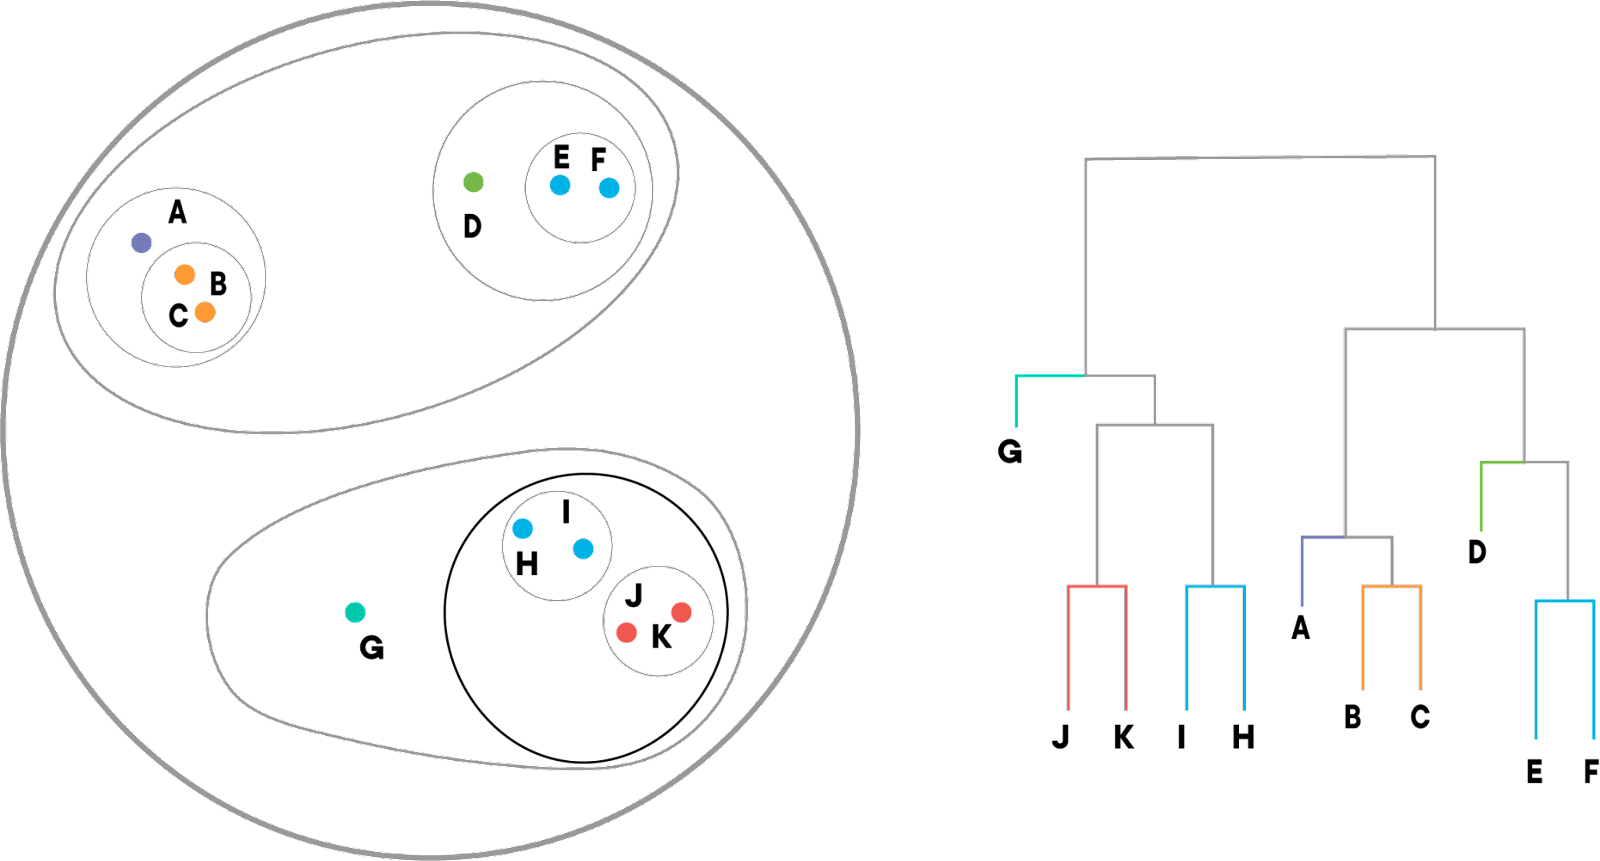

Например, слева мы видим, что изначально в самые маленькие внутренние кластеры объединились E и F, I и H, J и K, B и C. Справа мы также видим объединение этих кластеров на самом первом (нижнем) уровне дендрограммы. Далее слева видно, что к кластеру с элементами E и F присоединился элемент D. На дендрограмме справа мы также видим это присоединение в крайней правой ветви. Так можно провести полную аналогию между этими двумя схемами.

Ниже можно увидеть иллюстрацию процесса построения кластеров в «режиме реального времени»:

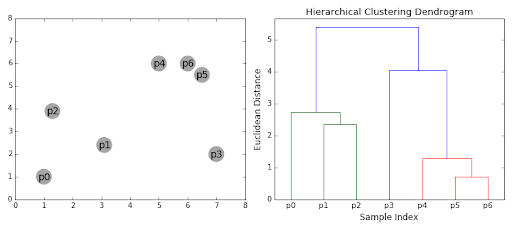

В данном юните мы будем рассматривать только агломеративный иерархический подход, т. к. именно он реализован в библиотеке sklearn и используется при решении задач машинного обучения. Его общую концепцию вы уже знаете — теперь необходимо разобраться в некоторых математических тонкостях.

Рассмотрим реализацию алгоритма на примере ↓

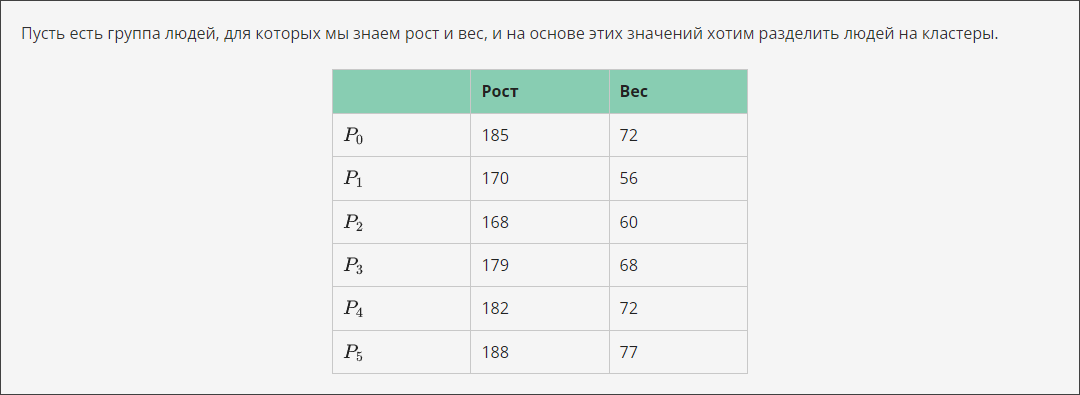

Для начала будем считать, что каждая точка — это отдельный кластер.

Теперь рассчитаем все попарные расстояния между точками:

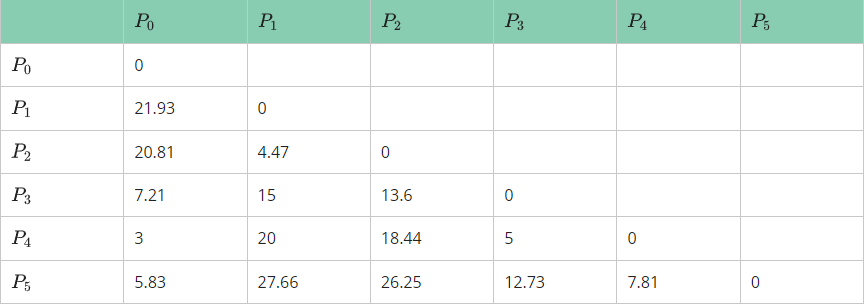

На главной диагонали в данной таблице стоят нули, так как, разумеется, у каждой точки расстояние до самой себя равно нулю. Остальные расстояния мы вычислили как евклидовы расстояния.

апример, расстояние между точками $P_4$ и $P_0$ будет выражаться следующим образом:

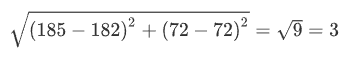

Все остальные расстояния были вычислены так же, а их значения были округлены до сотых.

Между кластерами $P_0$ и $P_4$ самое маленькое расстояние — объединяем их в один кластер. Теперь у нас осталось пять кластеров:

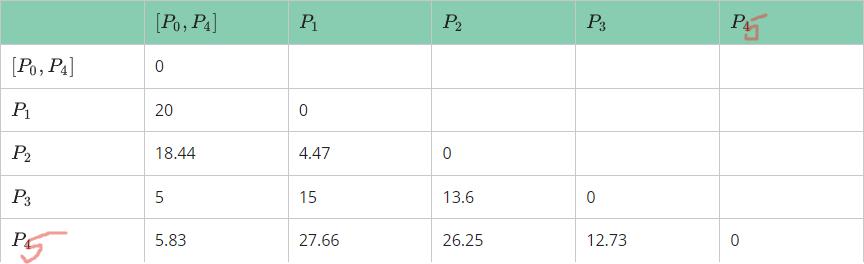

В таблице появились новые значения: расстояния от [$P_0, P_4$] до всех других кластеров, состоящих из одной точки. Расстояние для кластеров, в которых содержится более одной точки, уже невозможно вычислить, просто используя евклидово расстояние.

Что же делать? Будем вычислять расстояния для всех точек кластера и выбирать минимальное. То есть, к примеру, если мы хотим найти расстояние от точки $P_2$ до кластера [$P_0, P_4$], то отдельно рассчитаем расстояние от $P_2$ до $P_0$, потом — от $P_2$ до $P_4$ и в итоге возьмём минимальное из двух полученных чисел:

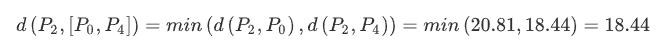

*Примечание. На самом деле не всегда берётся минимальное расстояние — есть и другие подходы, которые мы разберём чуть позднее.*

Итак, расстояния вычислены — можно идти дальше. Ищем следующую пару кластеров с минимальным расстоянием — теперь это $P_1$ и $P_2$. Объединяем их в один кластер. Получаем такой результат:

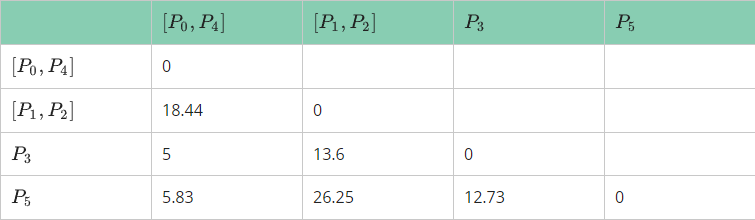

Вновь смотрим на все имеющиеся расстояния и видим, что пара с минимальным расстоянием — это $P_3$ и [$P_0, P_4$]. Объединяем эти кластеры:

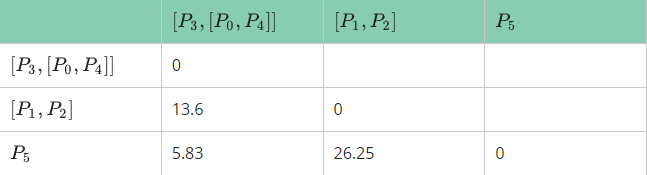

Ищем минимальное расстояние в последний раз — теперь это [$P_2,[P_0, P_4$]] и $P_5$. Объединяем и эту пару:

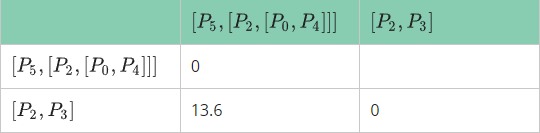

На следующей итерации оставшиеся два кластера объединяются в один, и на этом реализация алгоритма заканчивается.

Можно проиллюстрировать получившийся в данном примере результат с помощью дендрограммы:

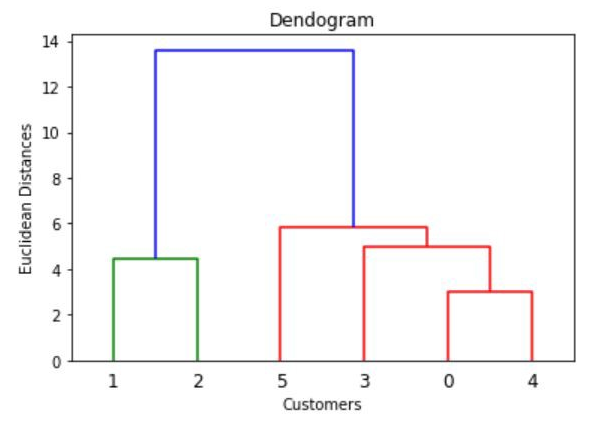

По оси абсцисс отложены кластеры, а по оси ординат — расстояние между кластерами на момент слияния. Если провести линию на уровне интересующего нас расстояния, то мы сможем увидеть, какое количество кластеров было в тот момент. Например, для расстояния, равного 4, мы можем наблюдать пять кластеров, так как у красной пунктирной линии пять пересечений с вертикальными линиями:

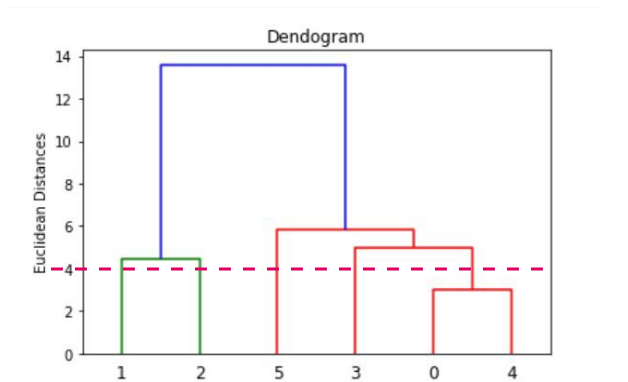

Также итоговое разбиение на два кластера в нашем примере можно проиллюстрировать следующим образом:

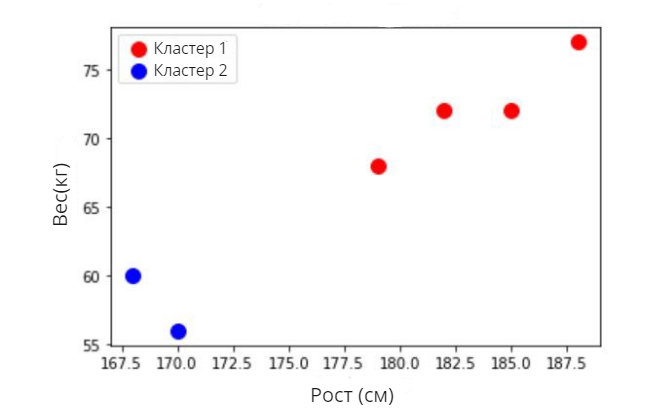

### Итак, мы рассмотрели на примере алгоритм реализации агломеративной иерархической кластеризации. Однако осталось ещё два вопроса, которые нас волнуют с точки зрения математики:

+ Всегда ли расстояние между двумя точками рассчитывается как евклидово расстояние?
+ Всегда ли итоговое расстояние между двумя кластерами с несколькими точками рассчитывается как минимальное из всех вычисленных расстояний?

Начнём с первого вопроса. На самом деле, расстояние можно вычислять различными способами. В библиотеке sklearn для вычисления расстояний предлагается несколько вариаций — вот наиболее популярные из них:

1. **Евклидово расстояние:**

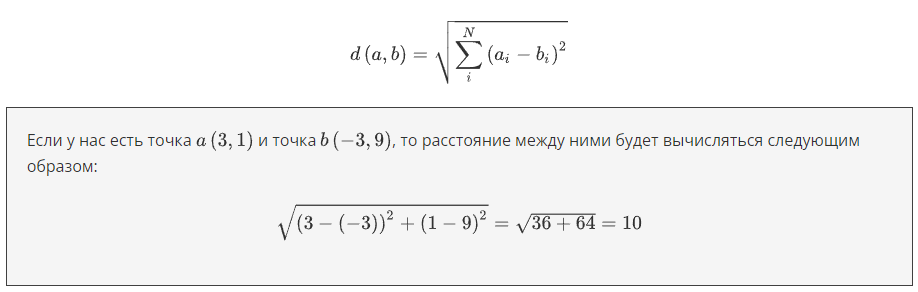

2. Расстояние городских кварталов (манхэттенское расстояние):

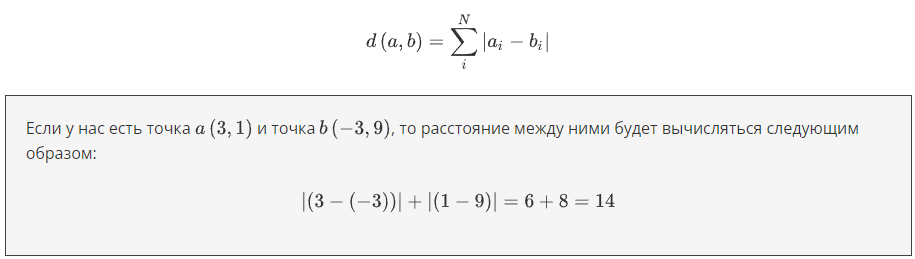

На иллюстрации ниже представлено сравнение евклидова и манхэттенского расстояний:

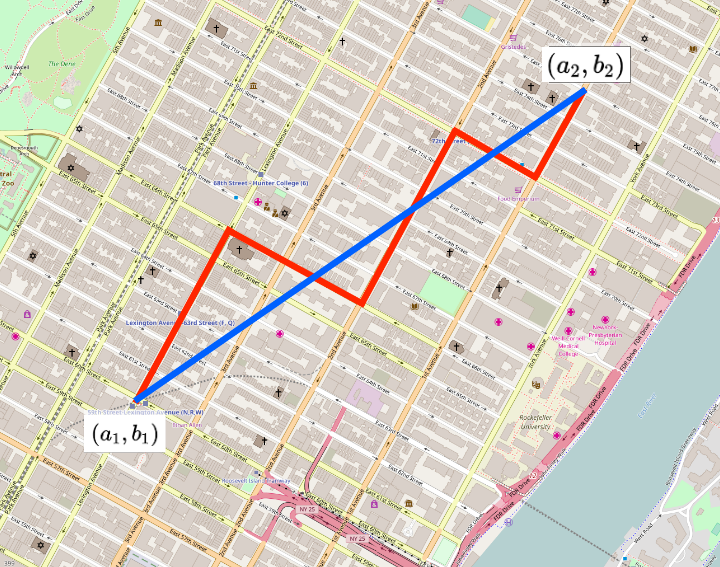

3. **Косинусная мера близости**

Это метрика, которая показывает не расстояние, а близость векторов (насколько маленький угол между ними). Чем больше её значение, тем ближе векторы друг к другу (максимально близки они в том случае, если совпадают). В числителе находится скалярное произведение, а в знаменателе — произведение длин векторов:

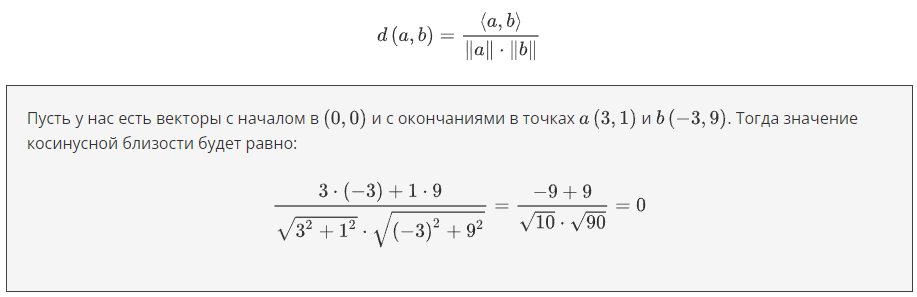

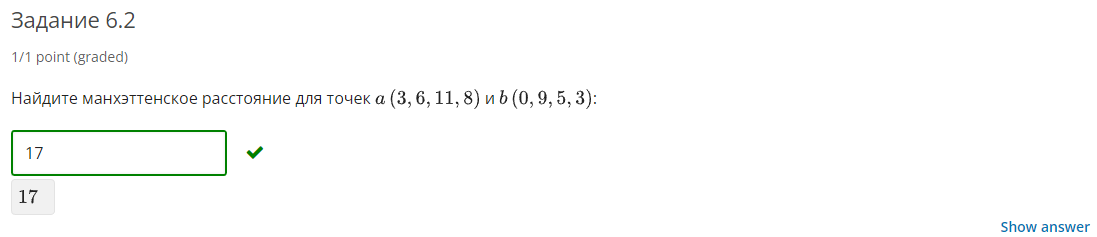
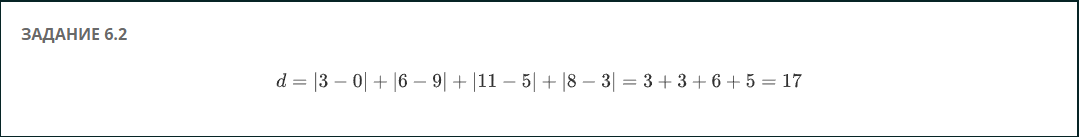


Отлично, мы разобрались с тем, как можно находить расстояния между двумя точками.

Теперь нас интересует следующий вопрос: как вычислить расстояния между двумя кластерами, если хотя бы в одном из них более одного объекта? То есть нам нужна метрика, как-то обобщающая попарные расстояния между точками кластеров. Таких метрик несколько.

## Расстояния между условными кластерами $A$ и $B$ можно вычислить с помощью одной из следующих формул:

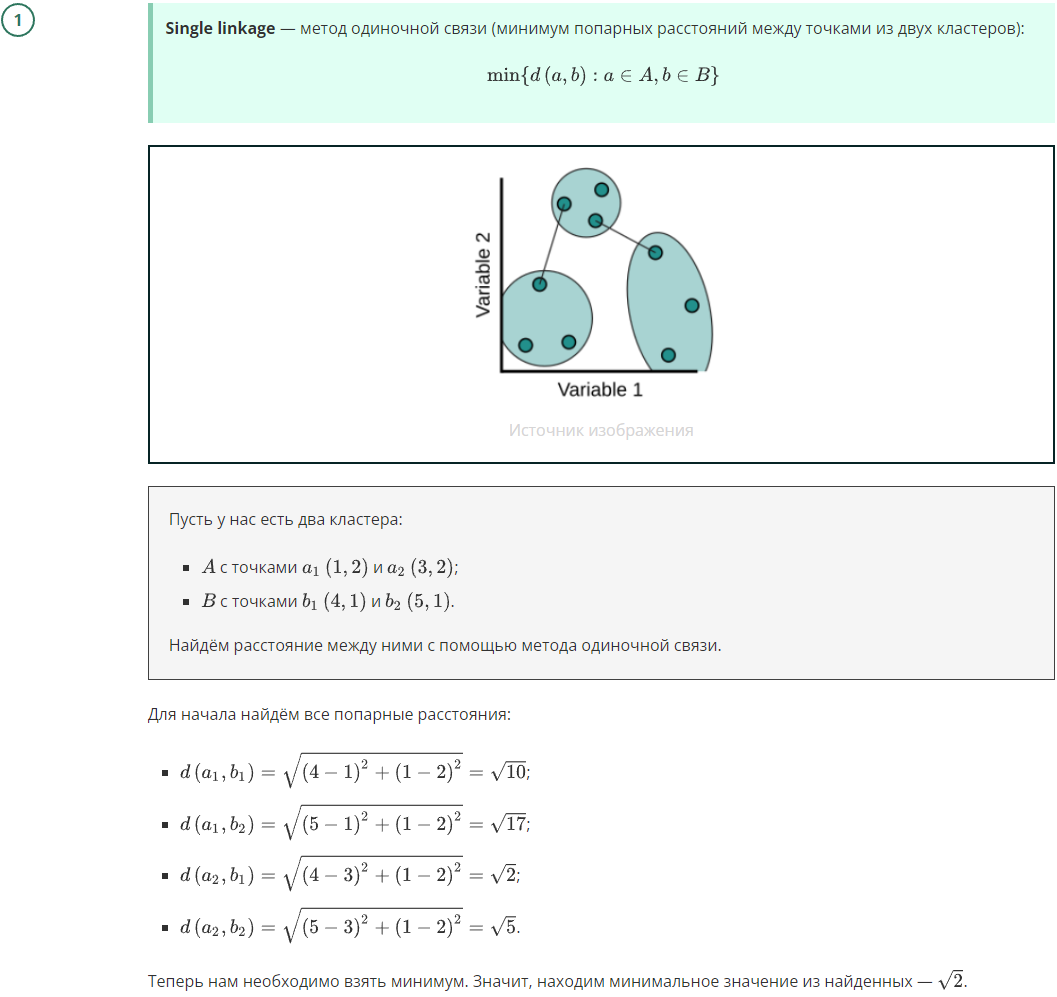
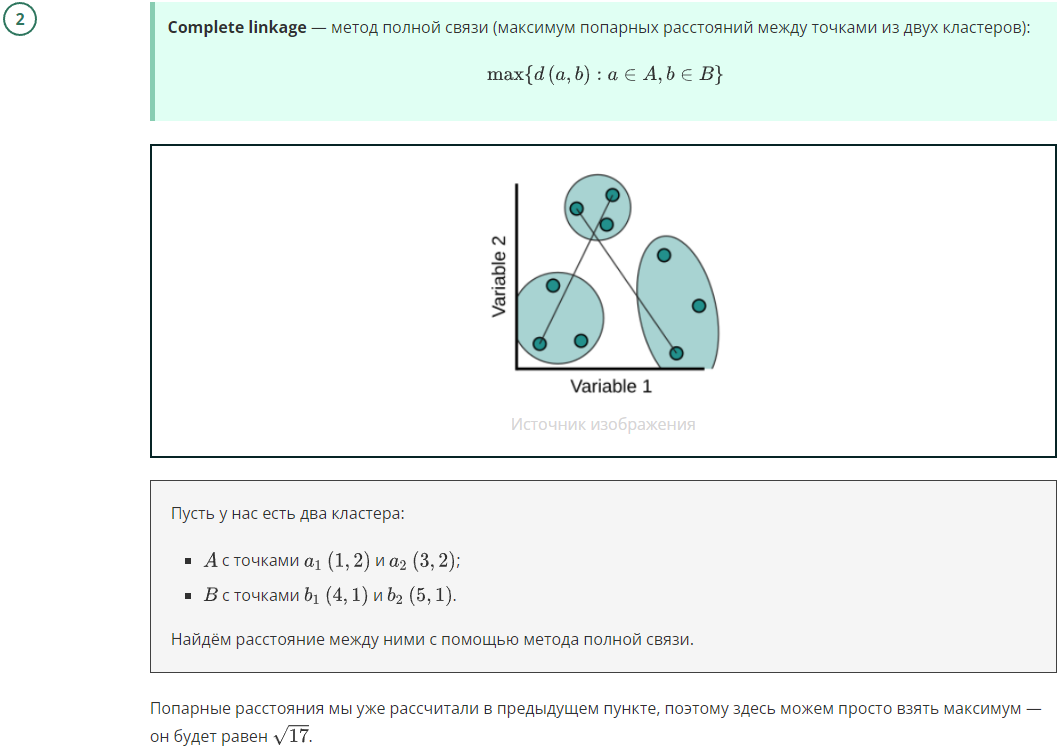
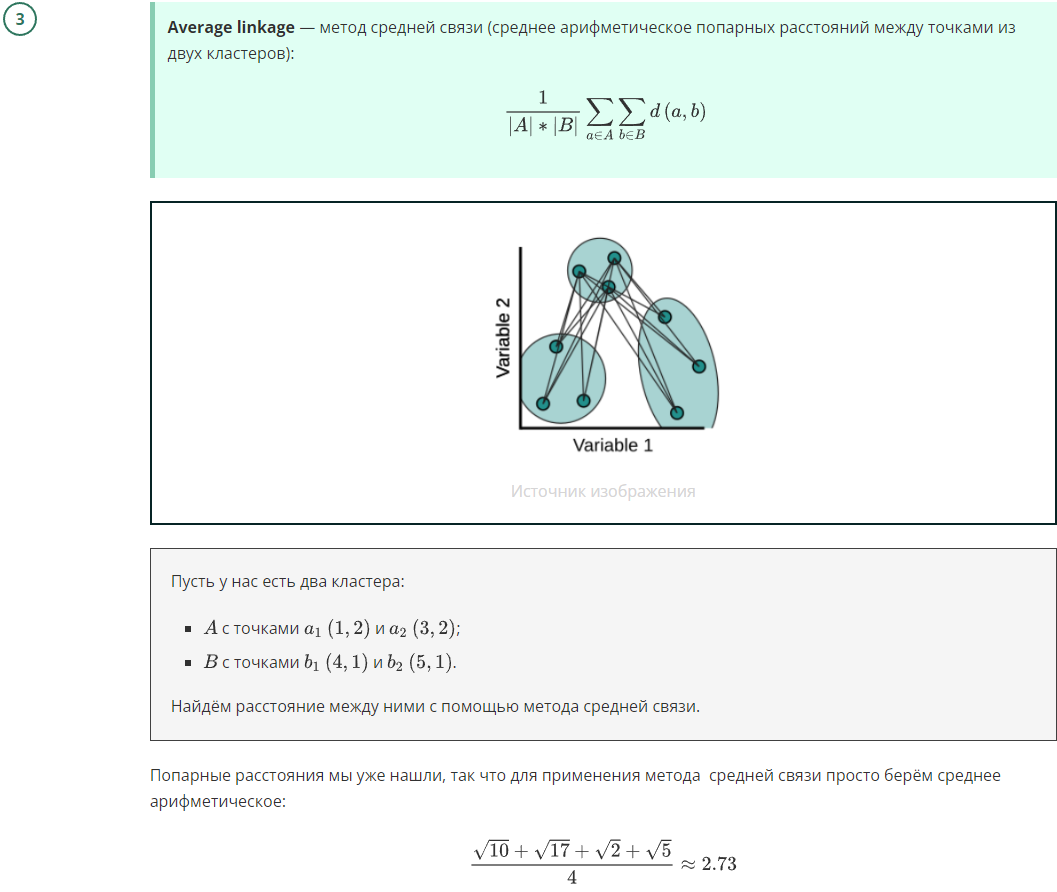
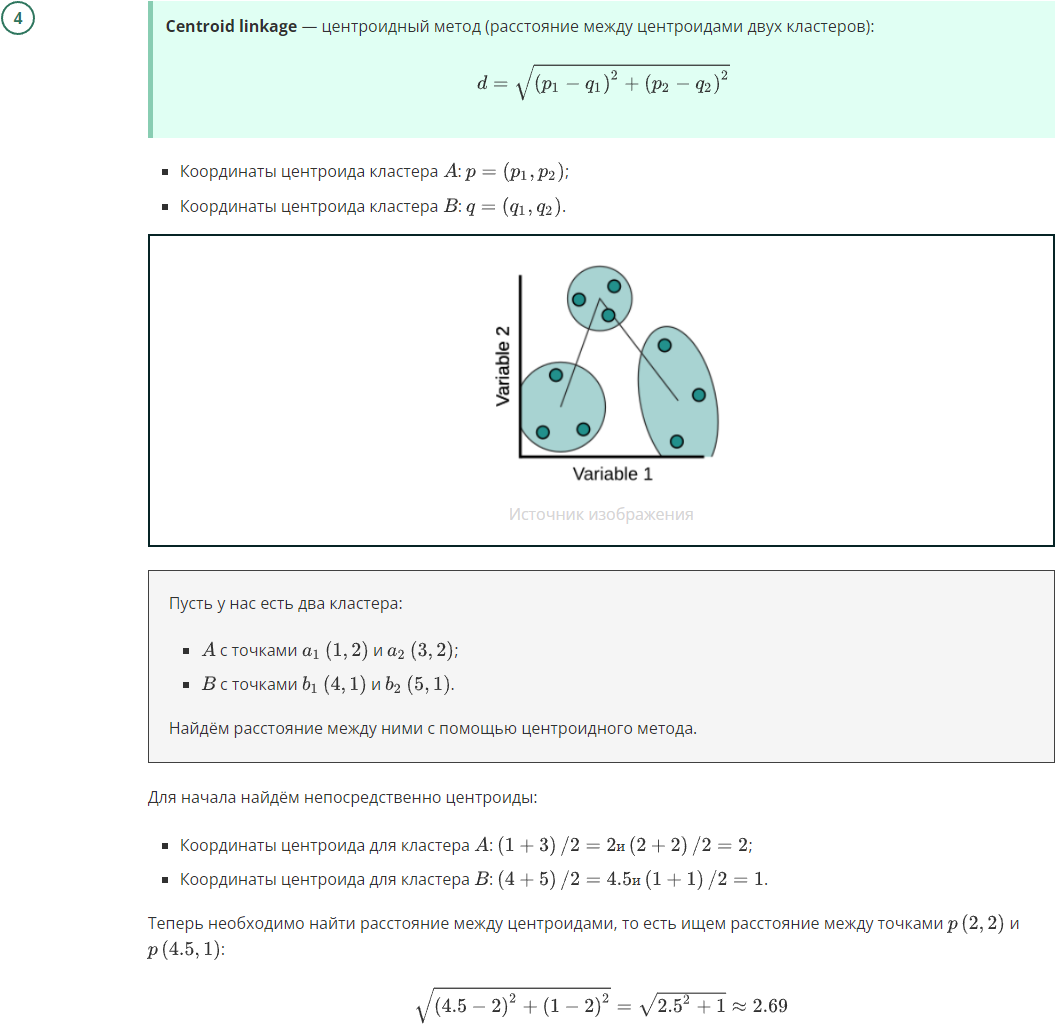

### → Первые три подхода более экономны с точки зрения вычислительной сложности, так как для них не надо заново рассчитывать расстояния после склеивания.

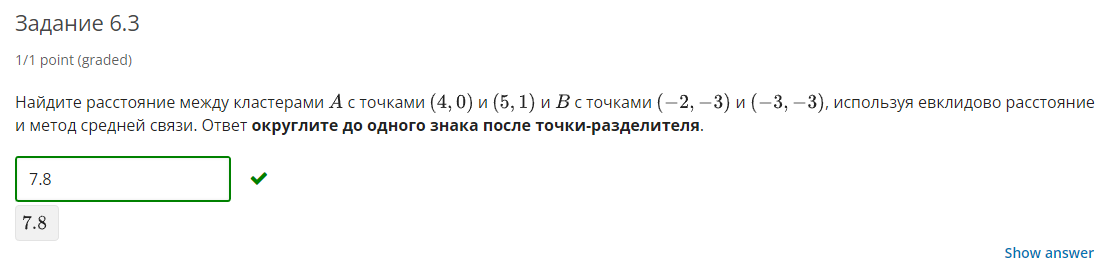
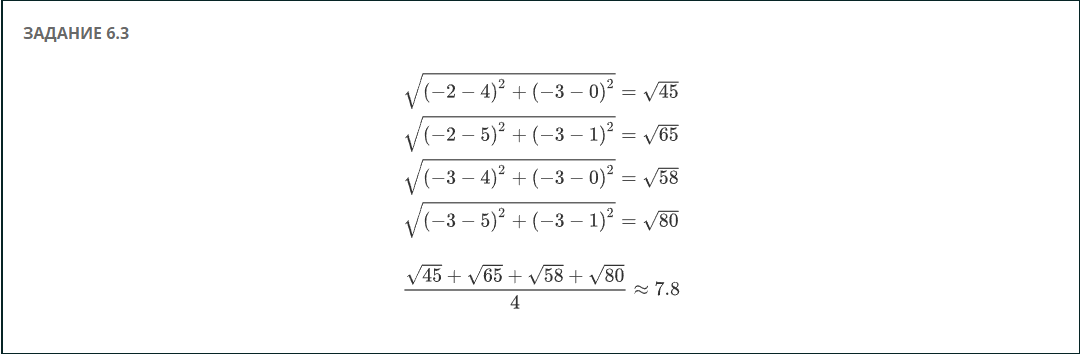

### Стоит помнить, что использование методов средней и полной связи приносит хорошие результаты, только если данные имеют высокую плотность и не пересекаются или однородно распределены. В остальных случаях данные методы отрабатывают плохо и стоит использовать метод одиночной связи.

Ранее вы уже рассматривали сравнение методов поиска расстояний на разных данных — приведём его и здесь для повторения:

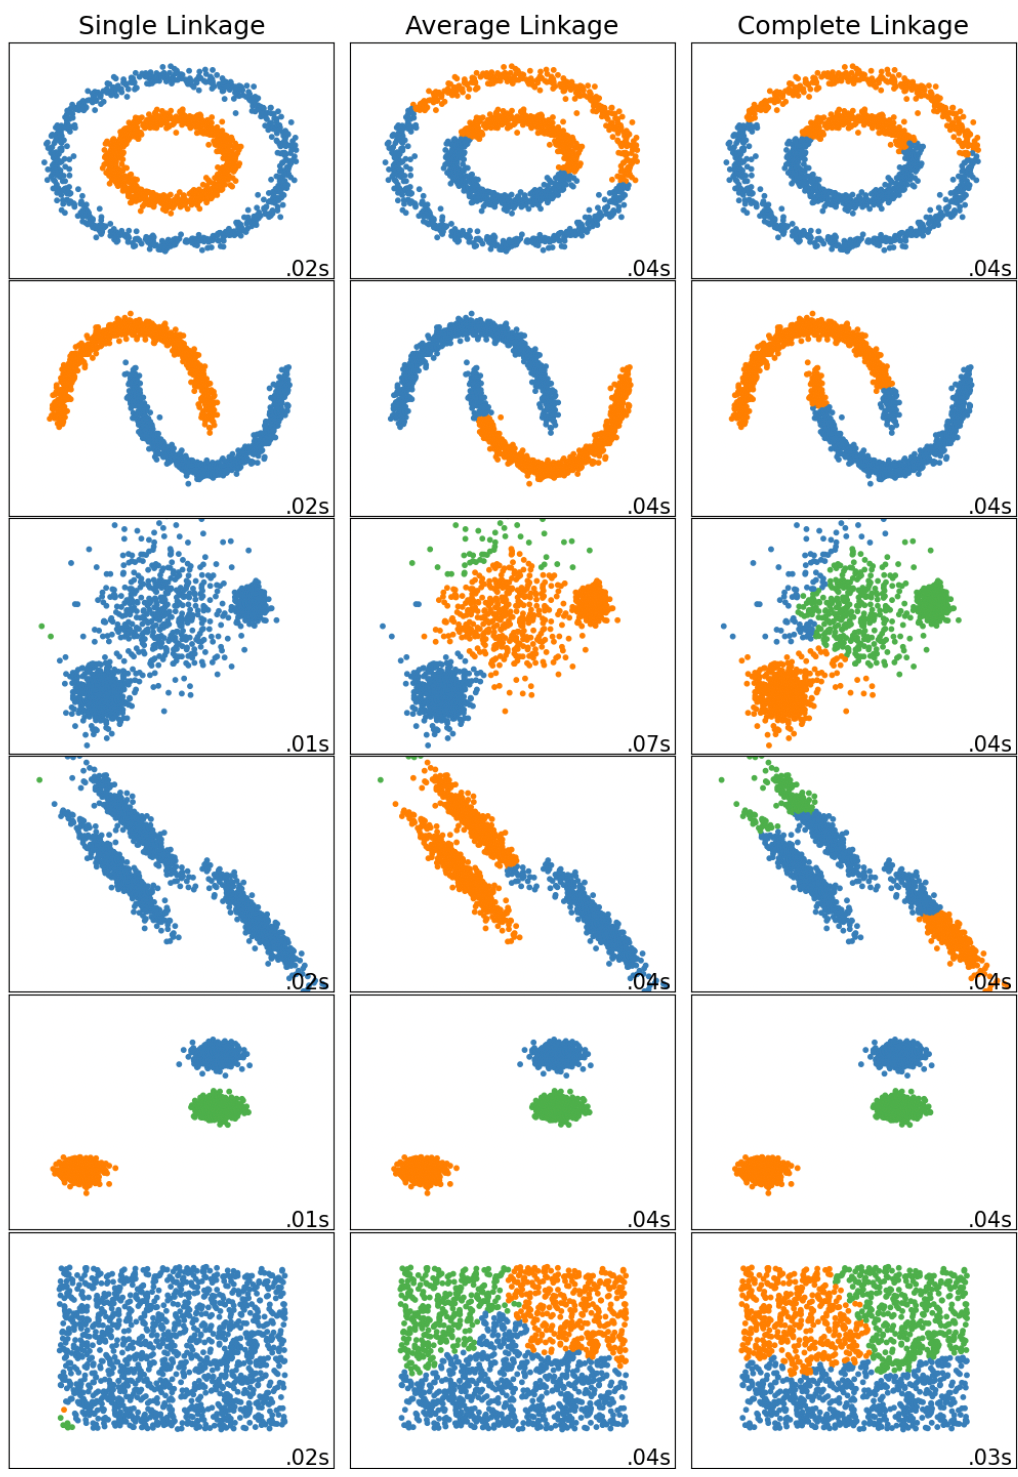

Итак, мы разобрали все основные моменты, касающиеся математической части метода агломеративной иерархической кластеризации.

## Резюмируем **последовательность действий**:

1. Сначала каждый элемент определяем как отдельный кластер.
2. Далее итеративно, пока не останется один кластер,
 + находим два ближайших кластера,
 + объединяем их.

Для реализации алгоритма в sklearn вам понадобится AgglomerativeClustering. Обычно ему передают следующие параметры:

+ n_clusters — количество кластеров; по умолчанию — 2.
+ linkage — метод определения расстояния между кластерами, которое мы рассматривали выше.
+ affinity — метод определения расстояний между точками (например, евклидово или манхэттенское).

### Повторим основные **плюсы и минусы агломеративной иерархической кластеризации**:

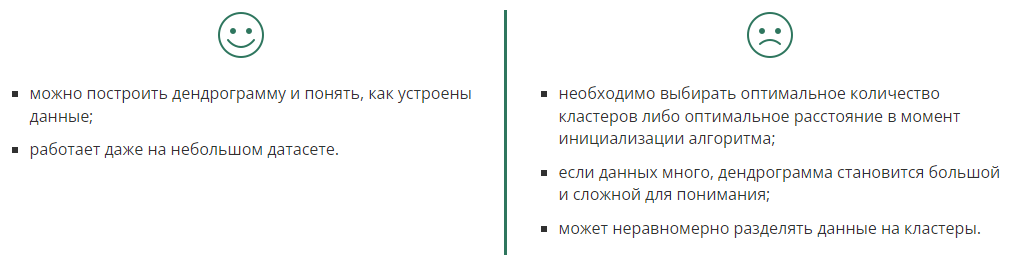

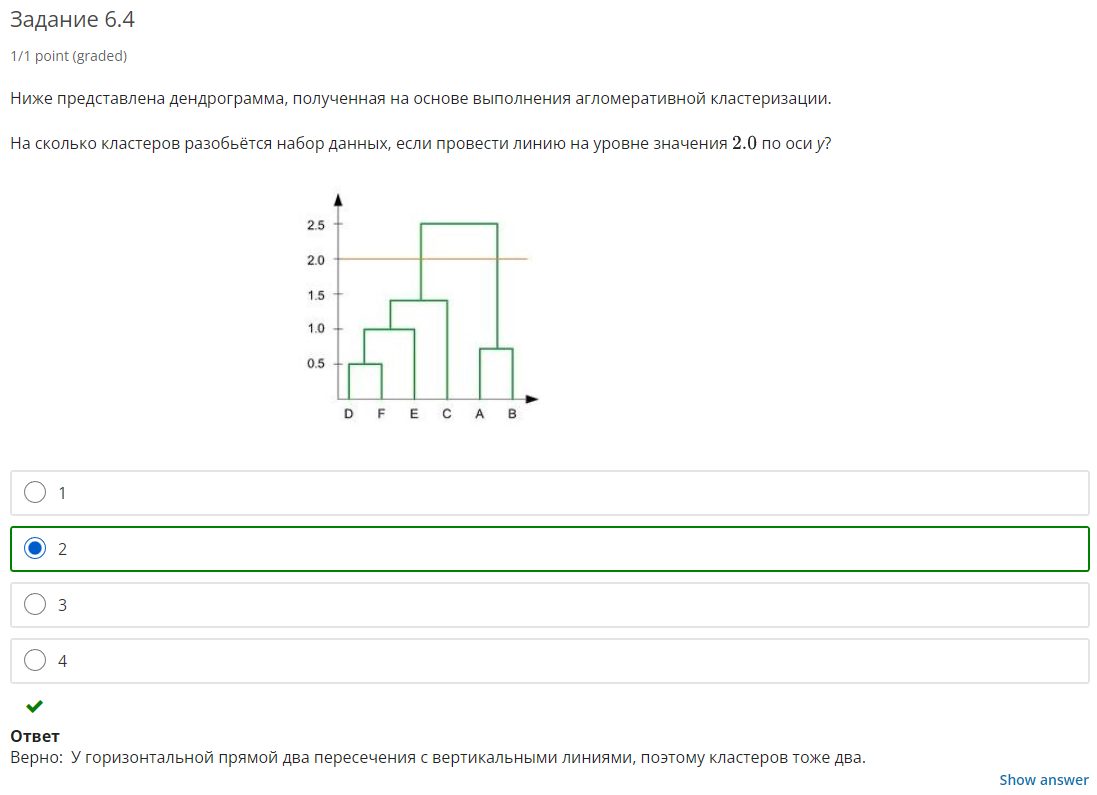

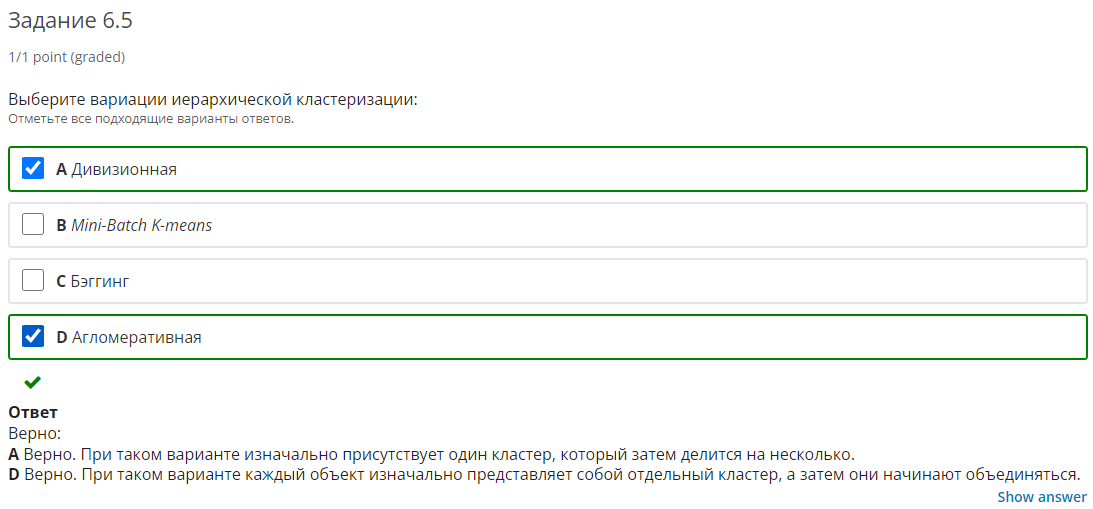

В данном юните мы рассмотрели последний интересующий нас алгоритм кластеризации — агломеративную иерархическую кластеризацию. Мы разобрали поэтапно шаги реализации данного метода, а также все связанные с ним математические выкладки. Уже в следующем юните вы сможете закрепить на практике знания по всем изученным алгоритмам кластеризации →
